# Surfs Up!

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.sql import label

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Step 1 - Climate Analysis and Exploration

In [10]:
precipitation_12_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2012-07-15").filter(Measurement.date <= "2013-08-15").all()

In [11]:
precipitation_df = pd.DataFrame(precipitation_12_months)
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])
precipitation_df = precipitation_df.set_index('date')

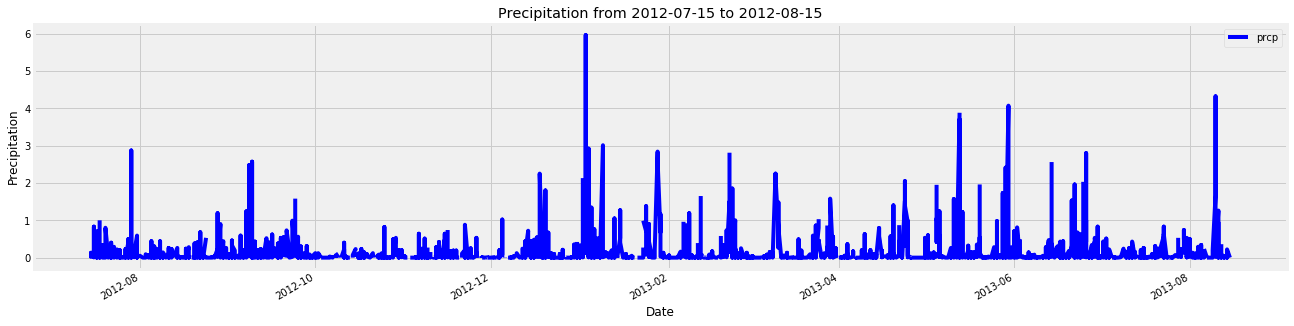

In [12]:
precipitation_chart = precipitation_df.plot(figsize = (20, 5), sort_columns = True, use_index = True, legend = True, grid = True, color = 'blue')
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.title ("Precipitation from 2012-07-15 to 2012-08-15")
plt.savefig("Precipitation from 2012-07-15 to 2012-08-15.png")

## Station Analysis

* Waihee station has the highest number of observations


In [13]:
active_station = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
active_station

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [14]:
tobs = session.query(Measurement.tobs).filter(Measurement.date >= "2017-07-23").filter(Measurement.date <= "2017-08-23").all()
tobs_df = pd.DataFrame(tobs)

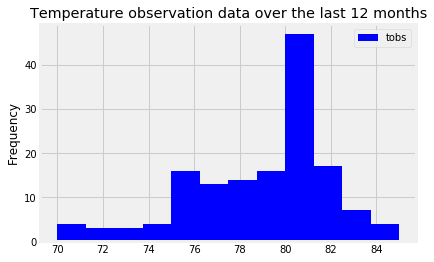

In [15]:
plt.hist(tobs_df["tobs"], color = "blue", bins = 12)
plt.ylabel("Frequency")
label = ["tobs"]
plt.title ("Temperature observation data over the last 12 months")
plt.legend(label)
plt.show()